# Pharma Lab (Stage 2)

**Learning Objectives:**
  * Practice basic data manipulation with Pandas
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to pharma transactions.
### 2. Each transaction is uniquely identified by `TransactionId`.
### 3. Several transactions can take place in a single `TicketNumber`.

## 1. Library Import

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [4]:
PharmaDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/PharmaDataSet.csv.zip",sep=',',parse_dates=['Date'])

In [5]:
PharmaDataSet.head(10)

,TransactionId,Date,Pharmacist,ItemId,ItemDescription,TicketNumber,Units,SellingPrice
0,172865,2019-01-01 10:47:41,dc0d3ee6,90,PLASTICO,0,1,0.060
1,172868,2019-01-01 10:47:41,dc0d3ee6,809459,POLARAMINE 2 MG 20 COMPRIMIDOS,0,1,4.008
2,172867,2019-01-01 10:47:41,dc0d3ee6,835454,EBASTEL FORTE FLAS 20 MG 20 LIOFILIZADOS ORALES,0,1,10.548
3,172866,2019-01-01 10:47:41,dc0d3ee6,995233,DACORTIN 30 MG 30 COMPRIMIDOS,0,1,4.512
4,172864,2019-01-01 11:07:21,dc0d3ee6,662042,PARACETAMOL VIATRIS EFG 1 G 40 COMPRIMIDOS,1,1,3.000
5,172862,2019-01-01 11:07:21,dc0d3ee6,656456,ACETILCISTEINA KERN PHARMA EFG 600 MG 20 COMPR...,1,1,4.932
6,172863,2019-01-01 11:07:21,dc0d3ee6,663526,NASONEX 50 MICROGRAMOS/PULVERIZACION SUSPENSIO...,1,1,10.788
7,172861,2019-01-01 11:28:11,dc0d3ee6,662585,"DUROGESIC MATRIX 50 MICROGRAMOS/H (3,6 MG/3 DI...",2,1,35.100
8,172858,2019-01-01 11:32:03,dc0d3ee6,656706,VENTOLIN 100 MICROGRAMOS/INHALACION SUSPENSION...,3,1,3.108
9,172860,2019-01-01 11:32:03,dc0d3ee6,400086,PROCHAMBER CAMARA DE INHALACION,3,1,8.736


In [6]:
PharmaDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759806 entries, 0 to 759805
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionId    759806 non-null  int64         
 1   Date             759806 non-null  datetime64[ns]
 2   Pharmacist       759806 non-null  object        
 3   ItemId           759806 non-null  int64         
 4   ItemDescription  759806 non-null  object        
 5   TicketNumber     759806 non-null  int64         
 6   Units            759806 non-null  int64         
 7   SellingPrice     759806 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 46.4+ MB


In [7]:
## we remove negative Prices

PharmaDataSet2=PharmaDataSet[PharmaDataSet['SellingPrice']>0]

In [8]:
# we extract the day
PharmaDataSet2['DateShort']=PharmaDataSet2['Date'].dt.date

In [9]:
# we compute the day of the week
PharmaDataSet2['DayOfWeek']=PharmaDataSet2['Date'].dt.day_name()

In [29]:
# we compute the month
PharmaDataSet2['Month']=PharmaDataSet2['Date'].dt.month

## 3. Visualization of continuous variables (LinePlots)

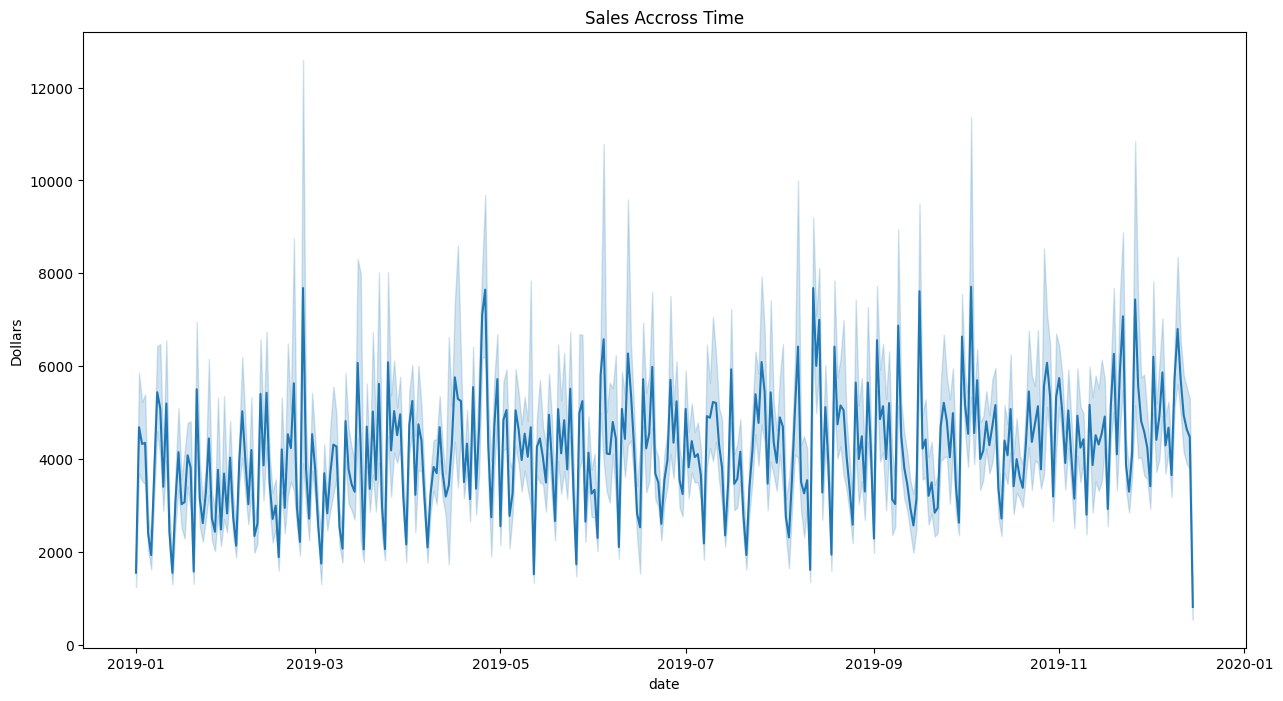

In [10]:

## we select the first 10K Transactions
plt.figure(figsize=(15,8))
sns.lineplot(data=PharmaDataSet2.head(100000), x="DateShort", y="SellingPrice",estimator='sum').set(title='Sales Accross Time', xlabel='date', ylabel='Dollars');

## 4. Visualization of continuous variables (Histograms)

<Axes: xlabel='SellingPrice', ylabel='Count'>

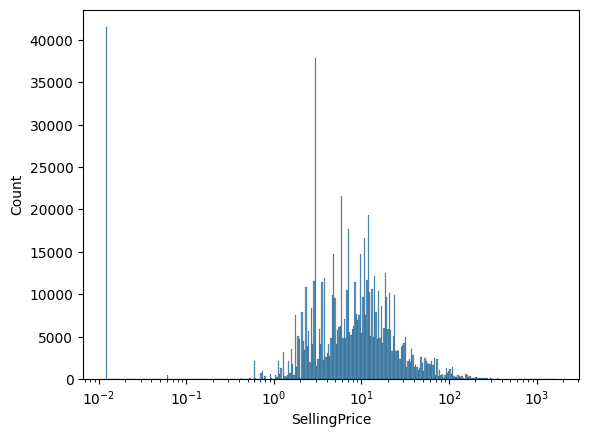

In [11]:
#Distribution of item's prices
sns.histplot(data=PharmaDataSet2, x="SellingPrice",log_scale=True)

In [12]:
ItemsSoldPerTicketNumber=PharmaDataSet2.groupby('TicketNumber')['Units'].count()
ItemsSoldPerTicketNumber

TicketNumber
0         4
1         3
2         1
3         4
4         2
         ..
391573    1
391574    1
391575    1
391576    5
391577    3
Name: Units, Length: 372311, dtype: int64

<Axes: xlabel='Units', ylabel='Count'>

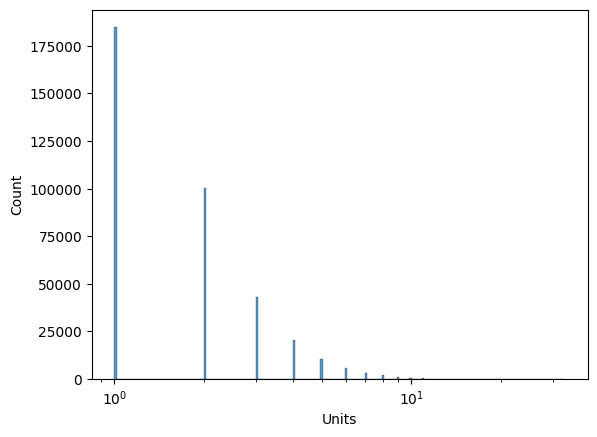

In [13]:
sns.histplot(data=ItemsSoldPerTicketNumber, log_scale=True)

In [14]:
RevenuePerTicketNumber=PharmaDataSet2.groupby('TicketNumber')['SellingPrice'].sum()
RevenuePerTicketNumber

TicketNumber
0         19.128
1         18.720
2         35.100
3         14.904
4         10.512
           ...  
391573     5.340
391574     5.940
391575     9.012
391576    30.924
391577    23.196
Name: SellingPrice, Length: 372311, dtype: float64

<Axes: xlabel='SellingPrice', ylabel='Count'>

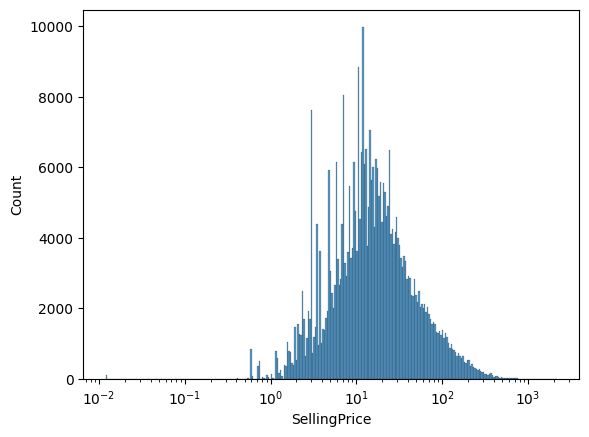

In [15]:
sns.histplot(data=RevenuePerTicketNumber, log_scale=True)

## 5. Visualization of discrete variables (BarPlots)

In [16]:
PharmaDataSet2

,TransactionId,Date,Pharmacist,ItemId,ItemDescription,TicketNumber,Units,SellingPrice,DateShort,DayOfWeek
0,172865,2019-01-01 10:47:41,dc0d3ee6,90,PLASTICO,0,1,0.060,2019-01-01,Tuesday
1,172868,2019-01-01 10:47:41,dc0d3ee6,809459,POLARAMINE 2 MG 20 COMPRIMIDOS,0,1,4.008,2019-01-01,Tuesday
2,172867,2019-01-01 10:47:41,dc0d3ee6,835454,EBASTEL FORTE FLAS 20 MG 20 LIOFILIZADOS ORALES,0,1,10.548,2019-01-01,Tuesday
3,172866,2019-01-01 10:47:41,dc0d3ee6,995233,DACORTIN 30 MG 30 COMPRIMIDOS,0,1,4.512,2019-01-01,Tuesday
4,172864,2019-01-01 11:07:21,dc0d3ee6,662042,PARACETAMOL VIATRIS EFG 1 G 40 COMPRIMIDOS,1,1,3.000,2019-01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...
759801,1215239,2024-02-09 21:57:45,9709ce9d,695331,ZINNAT 500 MG 10 COMPRIMIDOS RECUBIERTOS,391576,1,11.616,2024-02-09,Friday
759802,1215238,2024-02-09 21:57:45,9709ce9d,867184,FAMOTIDINA CINFA EFG 40 MG 28 COMPRIMIDOS RECU...,391576,1,6.816,2024-02-09,Friday
759803,1215234,2024-02-09 22:06:59,50a40157,816728,"RESPIBIEN 0,5 MG/ML SOLUCION PARA PULVERIZACIO...",391577,1,7.380,2024-02-09,Friday
759804,1215232,2024-02-09 22:06:59,50a40157,676635,ZITROMAX 500 MG 3 COMPRIMIDOS RECUBIERTOS,391577,1,6.744,2024-02-09,Friday


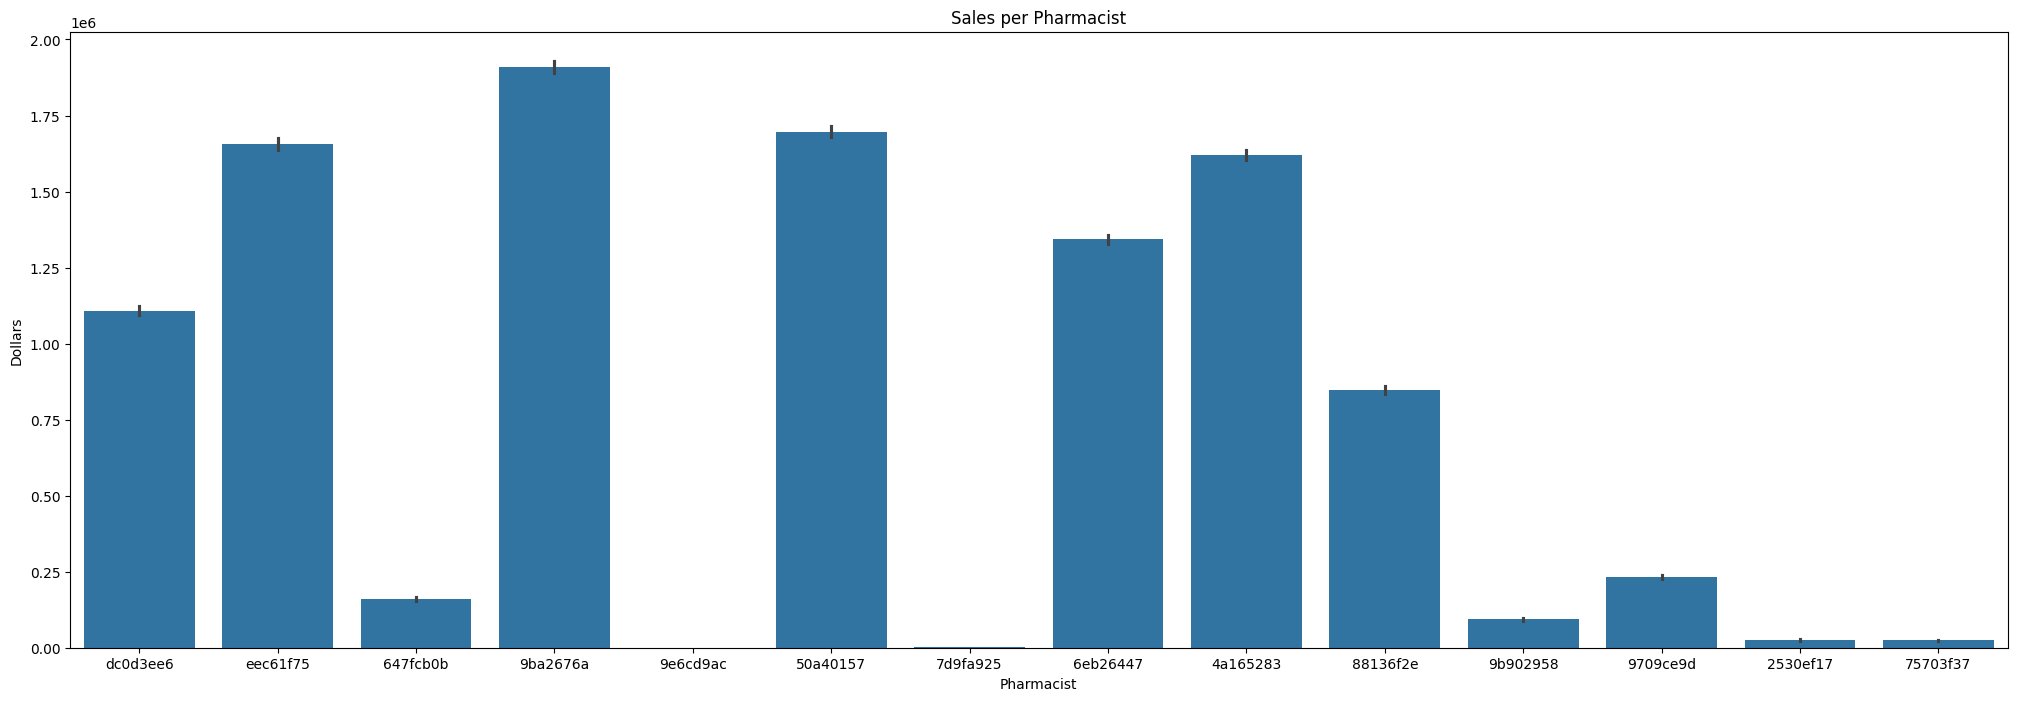

In [17]:
plt.figure(figsize=(25,8))
sns.barplot(PharmaDataSet2, x="Pharmacist", y="SellingPrice",estimator='sum').set(title='Sales per Pharmacist', xlabel='Pharmacist', ylabel='Dollars');

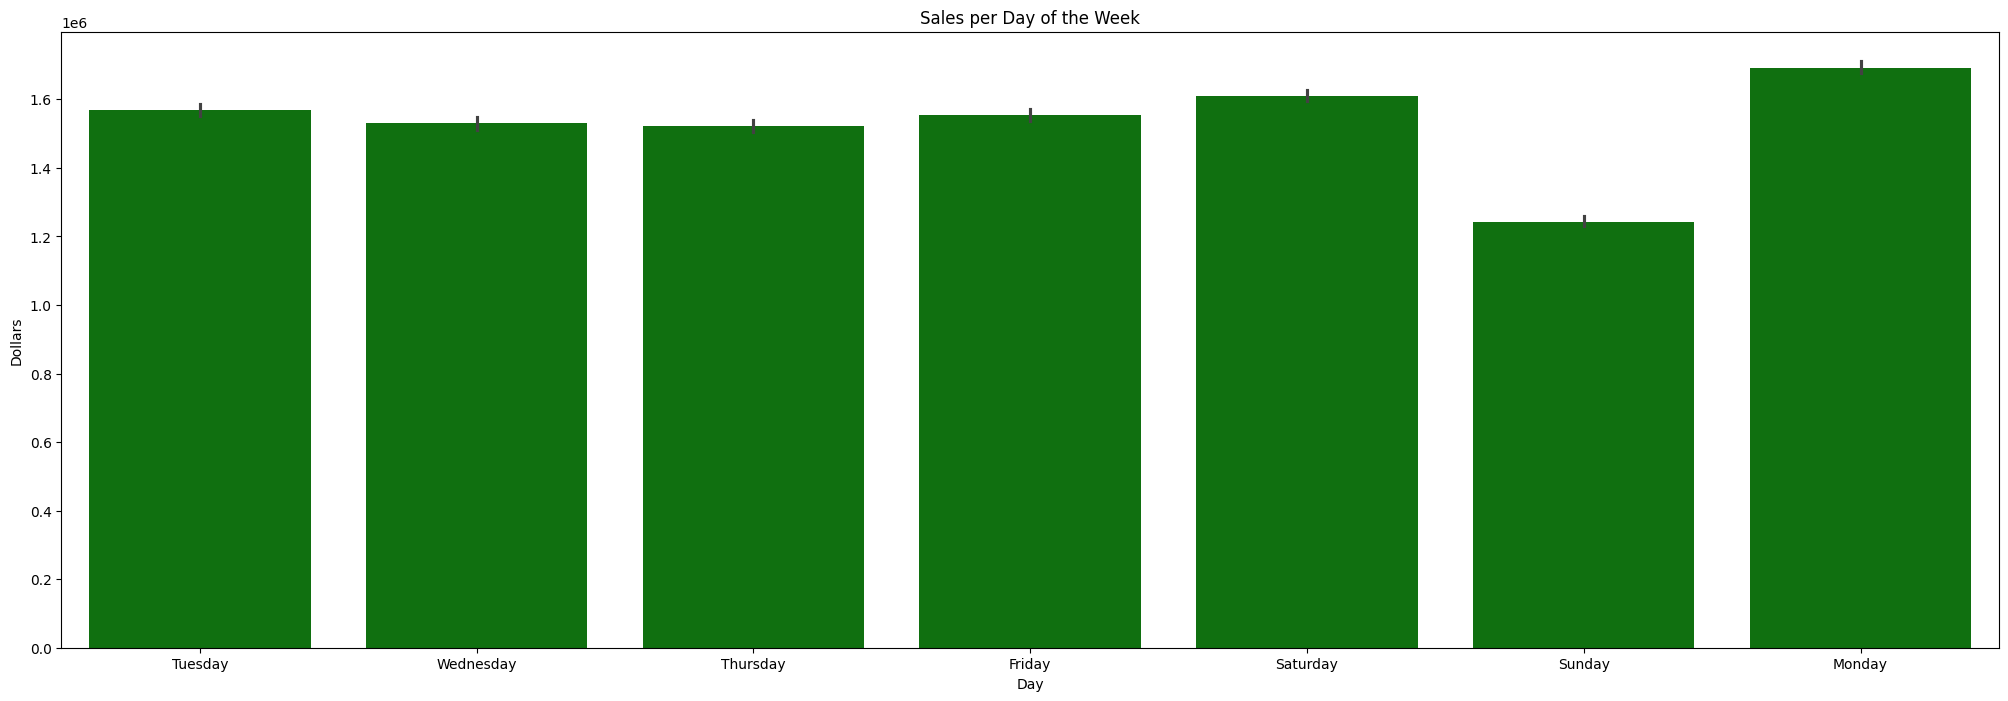

In [18]:
plt.figure(figsize=(25,8))
sns.barplot(PharmaDataSet2, x="DayOfWeek", y="SellingPrice",estimator='sum',color='green').set(title='Sales per Day of the Week', xlabel='Day', ylabel='Dollars');

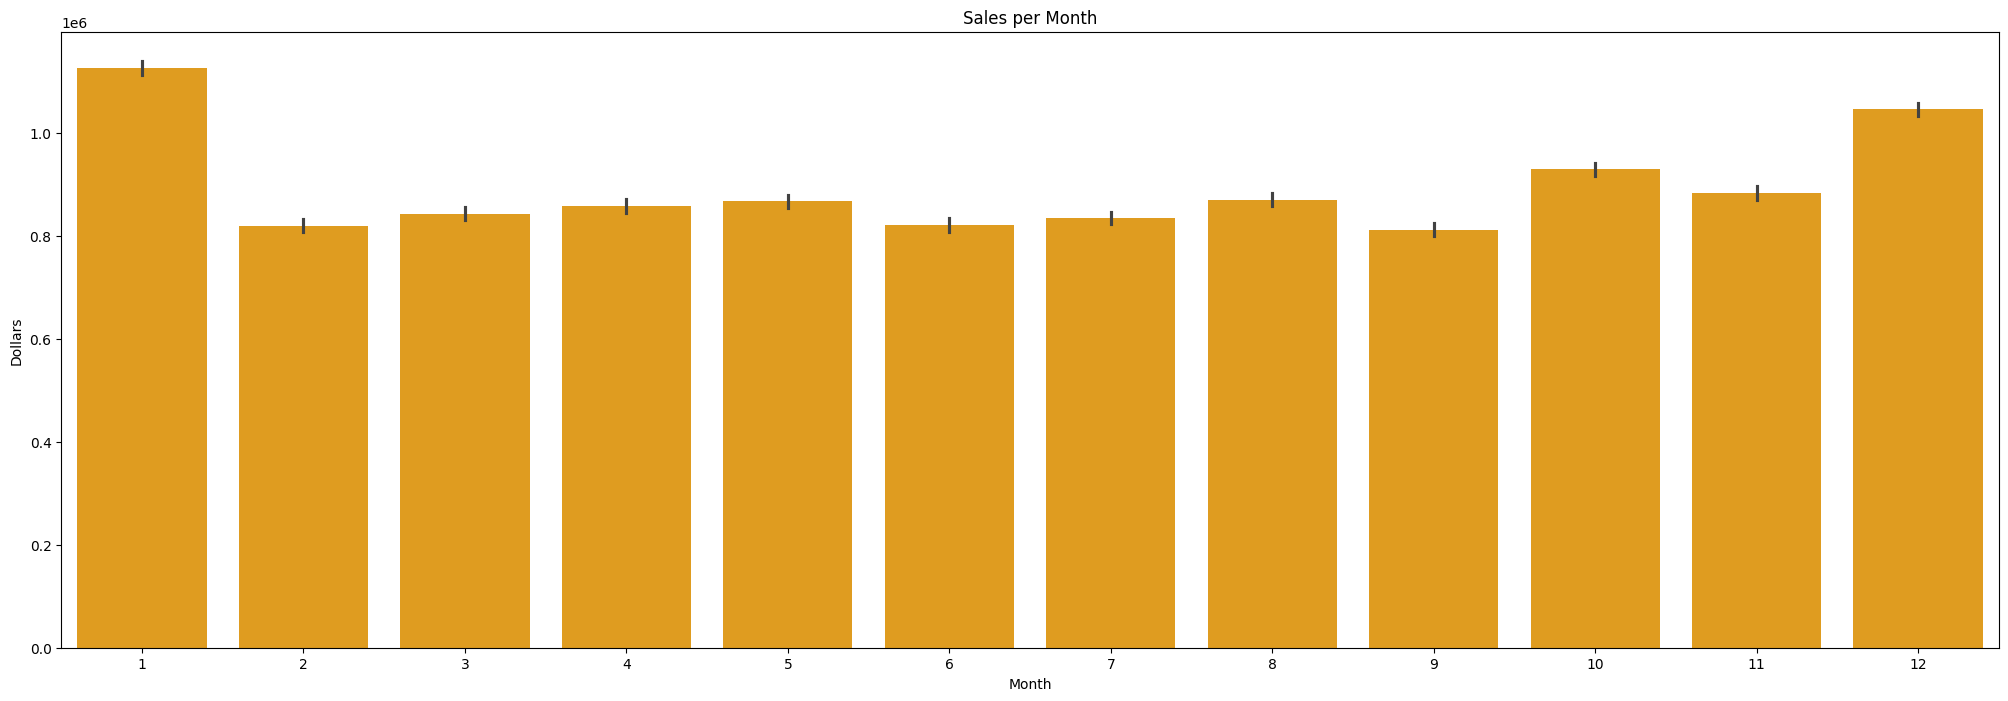

In [30]:
plt.figure(figsize=(25,8))
sns.barplot(PharmaDataSet2, x="Month", y="SellingPrice",estimator='sum',color='orange').set(title='Sales per Month', xlabel='Month', ylabel='Dollars');

## 6. Visualization of discrete variables (BoxPlots)

### Sales per Day of the Week

<Axes: xlabel='DayOfWeek', ylabel='SellingPrice'>

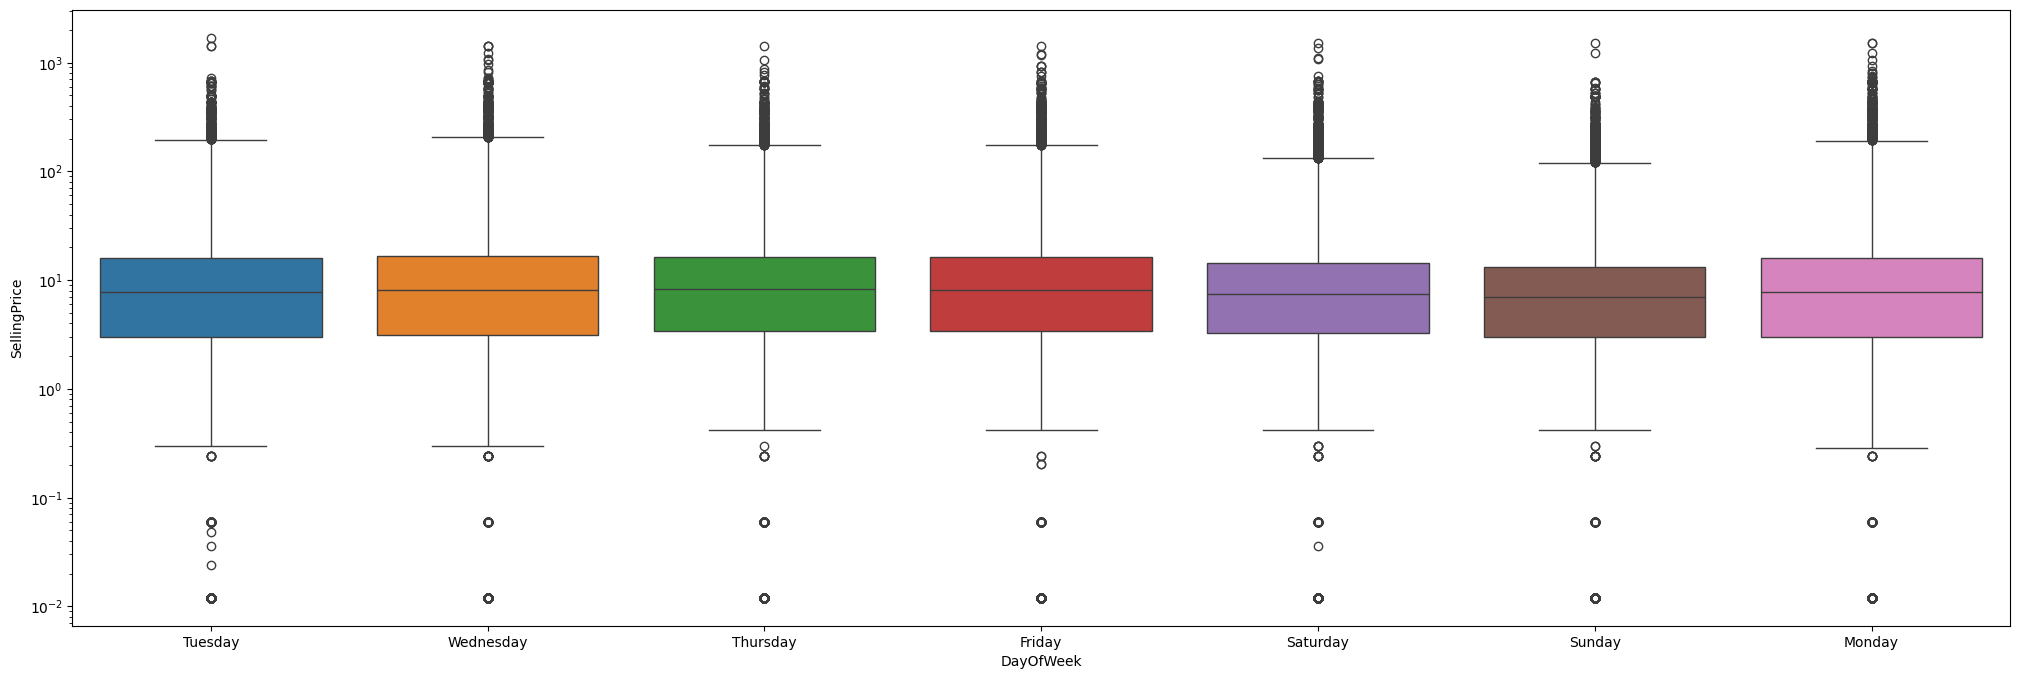

In [25]:
plt.figure(figsize=(25,8))
sns.boxplot(PharmaDataSet2, x="DayOfWeek", y="SellingPrice",log_scale=10,hue='DayOfWeek')

### Sales per Pharmacist

<Axes: xlabel='Pharmacist', ylabel='SellingPrice'>

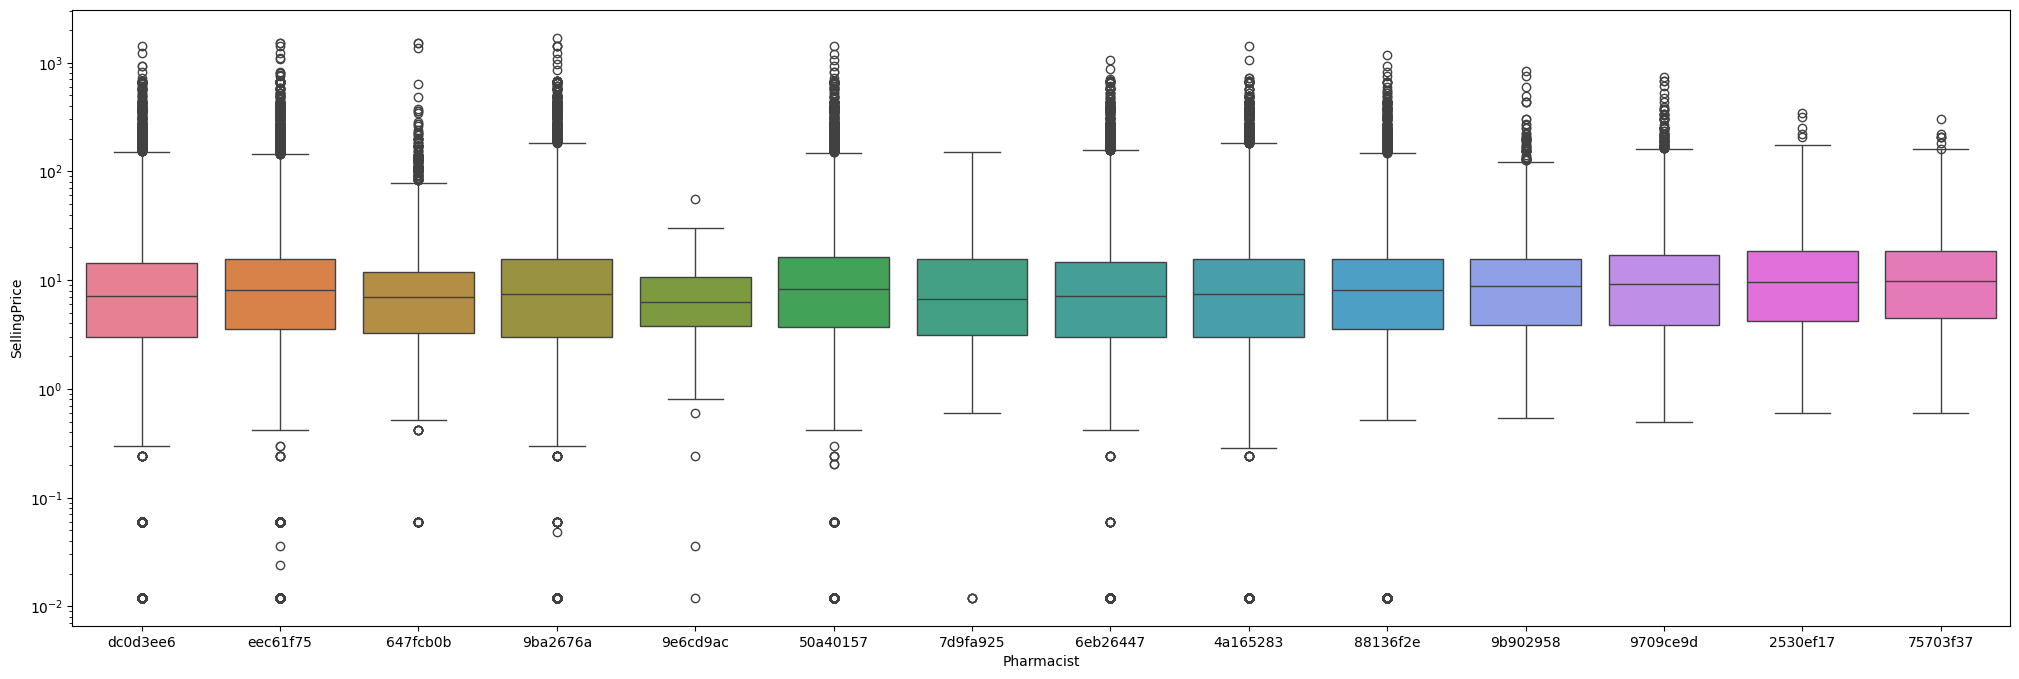

In [26]:
plt.figure(figsize=(25,8))
sns.boxplot(PharmaDataSet2, x="Pharmacist", y="SellingPrice",log_scale=10,hue='Pharmacist')